# Graph Representation
## 1. Create a random  graph with bellow conditions:
 + This is a weighted and directed graph.
 + The number of nodes: 6.
 + The number of edges: 10.
 + Weight of each edge is the random float number from 1 to 10.
 + Each node has a label which is the uppercase alphabet character from A to J.
 + Use can use networkx or define your own Graph class.



In [1]:
!pip install networkx pandas numpy matplotlib openpyxl

import networkx as nx
import numpy as np
import pandas as pd
import random

Defaulting to user installation because normal site-packages is not writeable


{('E', 'F'): Text(-0.35775901226354534, 0.30850129485247446, '8.4'),
 ('E', 'C'): Text(0.16496188456152988, -0.46825333182695067, '1.4'),
 ('E', 'B'): Text(0.26291443439769835, 0.111064745120249, '3.7'),
 ('F', 'B'): Text(0.03256525367736979, 0.3560727036266248, '1.8'),
 ('F', 'A'): Text(-0.33385993456796675, 0.627586800206372, '7.5'),
 ('B', 'F'): Text(0.03256525367736979, 0.3560727036266248, '1.7'),
 ('A', 'E'): Text(-0.10351075384763817, 0.3825788416999963, '6.2'),
 ('C', 'B'): Text(0.555286150502445, -0.42068192305280033, '5.8'),
 ('D', 'F'): Text(-0.4517753966548066, 0.03810308135280374, '9.8'),
 ('D', 'C'): Text(0.07094550017026868, -0.7386515453266214, '9.3')}

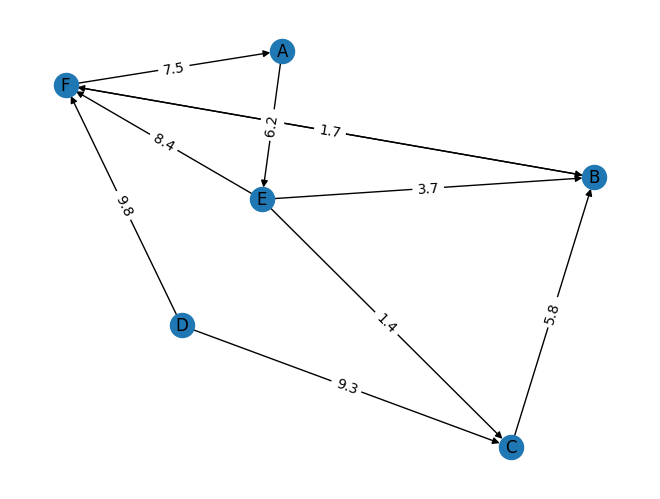

In [7]:
num_edges = 10

node_labels = "ABCDEF"
node_list = list(node_labels)
num_nodes = len(node_list)

G = nx.DiGraph()

edges = []

# Generate random edges
for i in range(num_edges):
    source, target = random.sample(node_list, 2)
    weight = round(random.uniform(1,10), 1)
    edge = (source, target, weight)
    edges.append(edge)
    
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
    

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    

## 2. Use the graph from requirement 1 to solve these problems:
 + Display the sparse and dense adjacency matrix of this graph.
 + Display the adjacency list.
 + Calculate the graph diameter.
 + Print the number of in-edges and out-edges of a node which entered from the keyboard.
 + Write a function to print the shortest path of 2 nodes.
 + Write functions to print all in-edges and out-edges of a node.


In [8]:
# Sparse adjacency matrix
A = nx.adjacency_matrix(G)
print(A)

# Dense adjacency matrix
A_dense = A.todense()
print(A_dense)

# Pandas format
nx.to_pandas_adjacency(G)

# Calculate graph diameter
# We cannot compute diameter for either 1) a connected directed graph or 2) a disconnected graph
# There are some acceptable answers:
# 1
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G, weight='weight')])
print(f"Graph diameter: {diameter}")

#2
if nx.is_connected(G.to_undirected()):
    graph_diameter = nx.diameter(G.to_undirected(), weight='weight')
    print(f"Graph diameter: {graph_diameter}")


# Get a vertex’s in-edges: 
print(f"IN-edges of node B: {G.in_degree('B')}")
# Get a vertex’s out-edges:
print(f"OUT-edges of node B: {G.out_degree('B')}")

#Shortest path of 2 nodes
def shortest_path(source, target):
    path = nx.shortest_path(G,source=source,target=target, weight='weight', method="dijkstra")

    print(f"Shortest path from {source} -> {target}: ")
    print("->".join(map(str, path)))
    
    return path

path = shortest_path("A", "B")

# pos = nx.spring_layout(G)
# nx.draw(G,pos,with_labels=True)
# path_edges = list(zip(path,path[1:]))
# nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')

# labels = nx.get_edge_attributes(G,'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
# nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r')

# # Function to print all in-edges
# def print_all_in_edges(G, v):
#     print(f"All in-edges of node of node {v}")
#     in_edges = G.in_edges(v)
#     for (s, t) in in_edges:
#         print(f"{s} ---> {t}")

# # Function to print all out-edges
# def print_all_out_edges(G, v):
#     print(f"All out-edges of node of node {v}")
#     out_edges = G.out_edges(v)
#     for (s, t) in out_edges:
#         print(f"{s} ---> {t}")
        
# # Print all in-edges
# print_all_in_edges(G, "E")

# # Print all out-edges
# print_all_out_edges(G, "E")
    


  (0, 1)	8.4
  (0, 2)	3.7
  (0, 4)	1.4
  (1, 2)	1.8
  (1, 3)	7.5
  (2, 1)	1.7
  (3, 0)	6.2
  (4, 2)	5.8
  (5, 1)	9.8
  (5, 4)	9.3
[[0.  8.4 3.7 0.  1.4 0. ]
 [0.  0.  1.8 7.5 0.  0. ]
 [0.  1.7 0.  0.  0.  0. ]
 [6.2 0.  0.  0.  0.  0. ]
 [0.  0.  5.8 0.  0.  0. ]
 [0.  9.8 0.  0.  9.3 0. ]]
Graph diameter: 23.5
Graph diameter: 16.900000000000002
IN-edges of node B: 3
OUT-edges of node B: 1
Shortest path from A -> B: 
A->E->B


## 3. Write a program to read a file containing edge information of an undirected graph and store its dense adjacency matrix into a file.
### Input: a file has format as follow: 
Node1 Node2 Weight<br />
0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2<br />
0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4<br />
0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1<br />
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5<br />
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2<br />
2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6<br />
3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3<br />
4 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2<br />
### Output: a file contains the dense adjacency matrix of this graph.


In [9]:
edge_file = "data/edges.txt"
adj_file = "data/adjacency.xlsx"

f = open(edge_file, "r")

edges = []
for x in f:
    edge_infor = x.split(" ")
    try:
        edge = (int(edge_infor[0]), int(edge_infor[1]), int(edge_infor[2]))
        edges.append(edge)
    except:
        continue

graph = nx.Graph()
    
graph.add_weighted_edges_from(edges)


# Adjacency matrix in Pandas format
data = nx.to_pandas_adjacency(graph)

# Store adjacency matrix into an excel file
data.to_excel(adj_file, sheet_name='data', index=False)
nx.to_pandas_adjacency(graph)

,0,1,2,5,3,4,6
0,0.0,2.0,4.0,1.0,0.0,0.0,0.0
1,2.0,0.0,0.0,2.0,5.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,6.0,0.0
5,1.0,2.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.0,0.0,0.0,0.0,3.0,0.0
4,0.0,0.0,6.0,0.0,3.0,0.0,2.0
6,0.0,0.0,0.0,0.0,0.0,2.0,0.0


# Centrality Measures
## 1. Write code to compute the following four centrality metrics for a graph using Networkx:

Dataset: /data/karate_edgelist.txt

1. Degree centrality
2. Closeness centrality 
3. Eighvector
4. PageRank
5. Betweenness centrality
6. Katz centrality



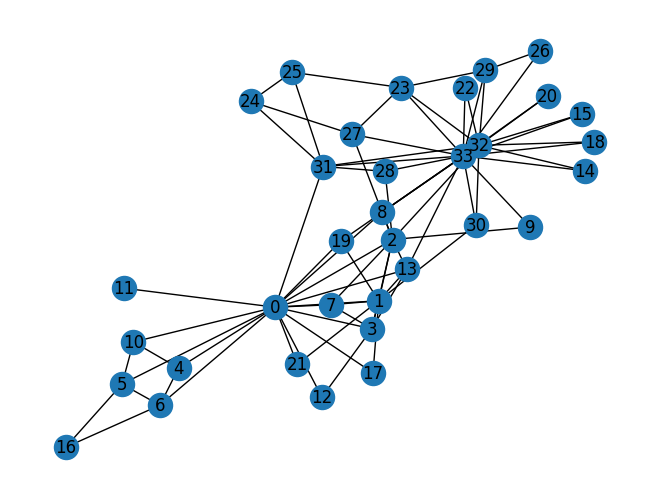

In [11]:
import networkx as nx
import networkx
import matplotlib.pyplot as plt

G = nx.read_edgelist('./data/karate_edgelist.txt')
nx.draw(G, with_labels = True)
#nx.draw(G, pos=nx.spiral_layout(G))
#nx.draw(G, pos=nx.shell_layout(G),with_labels = True)
#nx.draw(G, pos=nx.spiral_layout(G),with_labels = True)
plt.show()

In [13]:
#Degree centrality
nx.degree_centrality(G)

{'0': 0.48484848484848486,
 '31': 0.18181818181818182,
 '21': 0.06060606060606061,
 '19': 0.09090909090909091,
 '17': 0.06060606060606061,
 '13': 0.15151515151515152,
 '12': 0.06060606060606061,
 '11': 0.030303030303030304,
 '10': 0.09090909090909091,
 '8': 0.12121212121212122,
 '7': 0.12121212121212122,
 '6': 0.12121212121212122,
 '5': 0.12121212121212122,
 '4': 0.09090909090909091,
 '3': 0.18181818181818182,
 '2': 0.30303030303030304,
 '1': 0.2727272727272727,
 '30': 0.09090909090909091,
 '9': 0.06060606060606061,
 '32': 0.36363636363636365,
 '28': 0.09090909090909091,
 '27': 0.12121212121212122,
 '16': 0.06060606060606061,
 '33': 0.5151515151515151,
 '14': 0.06060606060606061,
 '15': 0.06060606060606061,
 '18': 0.06060606060606061,
 '20': 0.06060606060606061,
 '22': 0.06060606060606061,
 '23': 0.15151515151515152,
 '29': 0.12121212121212122,
 '25': 0.09090909090909091,
 '24': 0.09090909090909091,
 '26': 0.06060606060606061}

In [14]:
#Closeness centrality
nx.closeness_centrality(G)

{'0': 0.5689655172413793,
 '31': 0.5409836065573771,
 '21': 0.375,
 '19': 0.5,
 '17': 0.375,
 '13': 0.515625,
 '12': 0.3707865168539326,
 '11': 0.36666666666666664,
 '10': 0.3793103448275862,
 '8': 0.5076923076923077,
 '7': 0.44,
 '6': 0.38372093023255816,
 '5': 0.38372093023255816,
 '4': 0.3793103448275862,
 '3': 0.4647887323943662,
 '2': 0.559322033898305,
 '1': 0.4852941176470588,
 '30': 0.4520547945205479,
 '9': 0.4342105263157895,
 '32': 0.515625,
 '28': 0.4520547945205479,
 '27': 0.4583333333333333,
 '16': 0.28448275862068967,
 '33': 0.55,
 '14': 0.3707865168539326,
 '15': 0.3707865168539326,
 '18': 0.3707865168539326,
 '20': 0.3707865168539326,
 '22': 0.3707865168539326,
 '23': 0.39285714285714285,
 '29': 0.38372093023255816,
 '25': 0.375,
 '24': 0.375,
 '26': 0.3626373626373626}

In [15]:
#Betweenness centrality
nx.betweenness_centrality(G)

{'0': 0.4376352813852815,
 '31': 0.13827561327561327,
 '21': 0.0,
 '19': 0.03247504810004811,
 '17': 0.0,
 '13': 0.04586339586339585,
 '12': 0.0,
 '11': 0.0,
 '10': 0.0006313131313131313,
 '8': 0.04803541366041367,
 '7': 0.0,
 '6': 0.029987373737373736,
 '5': 0.029987373737373736,
 '4': 0.0006313131313131313,
 '3': 0.012224927849927847,
 '2': 0.14397246272246272,
 '1': 0.06151244588744589,
 '30': 0.013780663780663773,
 '9': 0.0008477633477633478,
 '32': 0.14650974025974026,
 '28': 0.0017947330447330447,
 '27': 0.022333453583453587,
 '16': 0.0,
 '33': 0.3050219456469456,
 '14': 0.0,
 '15': 0.0,
 '18': 0.0,
 '20': 0.0,
 '22': 0.0,
 '23': 0.017613636363636363,
 '29': 0.0029220779220779218,
 '25': 0.0038404882154882162,
 '24': 0.0022095959595959595,
 '26': 0.0}

In [16]:
#eigenvector centrality
nx.eigenvector_centrality(G, weight='weight',max_iter = 600)

{'0': 0.36340322152371823,
 '31': 0.19391235526467543,
 '21': 0.09502743886678545,
 '19': 0.15074069425877987,
 '17': 0.09502743886678545,
 '13': 0.23168960174762762,
 '12': 0.08727193009064159,
 '11': 0.05458375974340858,
 '10': 0.07882124525103748,
 '8': 0.20427198523945406,
 '7': 0.17597634635563317,
 '6': 0.08254575066824002,
 '5': 0.08254575066824003,
 '4': 0.0788212452510375,
 '3': 0.21762871206321316,
 '2': 0.32130498941520813,
 '1': 0.26926245420725053,
 '30': 0.14187116747780765,
 '9': 0.10397399253360913,
 '32': 0.30434830432778526,
 '28': 0.13310024335175433,
 '27': 0.13549254883813314,
 '16': 0.024796904964651582,
 '33': 0.37091821010145454,
 '14': 0.10142748835443074,
 '15': 0.10142748835443074,
 '18': 0.10142748835443074,
 '20': 0.10142748835443074,
 '22': 0.10142748835443074,
 '23': 0.15125166304922122,
 '29': 0.1355731646608959,
 '25': 0.06064480712266924,
 '24': 0.05858677685320158,
 '26': 0.0760769040517285}

In [17]:
# PageRank Centrality
nx.pagerank(G, weight='weight')

{'0': 0.09789686019331435,
 '31': 0.03749657233342063,
 '21': 0.014681068329348065,
 '19': 0.019801658670267775,
 '17': 0.014681068329348065,
 '13': 0.029841303693564695,
 '12': 0.014738664798770302,
 '11': 0.009612449263038982,
 '10': 0.022082833574226392,
 '8': 0.02481123690560326,
 '7': 0.024720713352644988,
 '6': 0.029239344307407048,
 '5': 0.029239344307407048,
 '4': 0.022082833574226392,
 '3': 0.03618499594160287,
 '2': 0.05780553687161427,
 '1': 0.05366914022580437,
 '30': 0.019765741927190116,
 '9': 0.014445784534367661,
 '32': 0.07291854442300538,
 '28': 0.019757942938627582,
 '27': 0.025866469140843614,
 '16': 0.01683872691539262,
 '33': 0.10241745374804112,
 '14': 0.014697122860881033,
 '15': 0.014697122860881033,
 '18': 0.014697122860881033,
 '20': 0.014697122860881033,
 '22': 0.014697122860881033,
 '23': 0.031828243882603455,
 '29': 0.026557846618628755,
 '25': 0.021144607716618222,
 '24': 0.0212114411565215,
 '26': 0.015175958022145254}

# 2.  Construct a graph from adjacency matrix in the adj_matrix.csv

dataset: /data/adj_matrix.csv
Caculate centrality meassures:

1. Degree centrality
2. Closeness centrality
3. Eighvector
4. PageRank
5. Betweenness centrality
6. Katz centrality

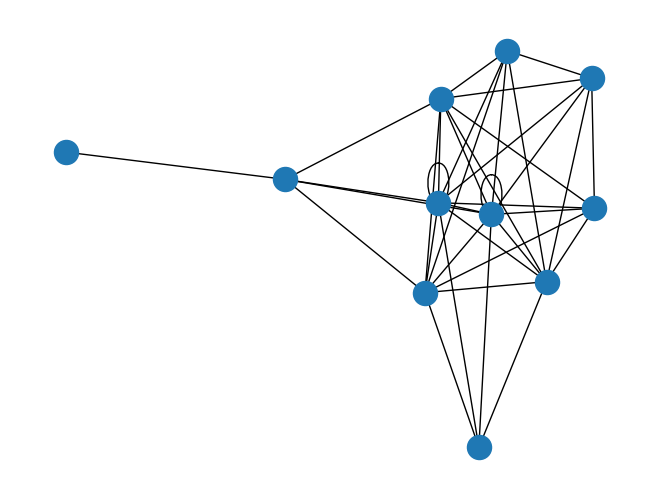

In [19]:
import pandas as pd
import networkx as nx
input_data = pd.read_csv('./data/adj_matrix.csv', index_col=0)
G = nx.Graph(input_data.values)
nx.draw(G)

In [23]:
#Degree_centrality
degree_centrality = nx.degree_centrality(G)

#Closeness centrality
Closeness_centrality= nx.closeness_centrality(G)

#Betweenness centrality
Betweenness_centrality = nx.betweenness_centrality(G)

#Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight',max_iter = 600)

# Katz Centrality
Katz_Centrality = nx.katz_centrality(G)

# PageRank Centrality
PageRank_Centrality = nx.pagerank(G, weight='weight')